BUSINESS UNDERSTANDING

Model ini dibuat untuk mendapatkan prediksi harga silver dalam USD yg dapat dengan inputan:

Harga dimana komuditas jenis silver dibuka dipasar saat perdagangan dimulai

Harga tertinggi dimana komuditas jenis silver diperdagangan selama satu periode

Harga minimum silver dalam satu periode 

DATA UNDERSTANDING

Date : Tanggal

Open : Harga pembukaan pada pertama kali transaksi dilakukan dihari itu

# deskripsi library yang digunakan

In [5]:
import pandas as pd
import numpy as np

# library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# library untyk analisis time series
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# library yang digunakan untuk forcasting
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# memanggil dataset

In [6]:
df = pd.read_excel('opendate.xlsx')

# deskripsi dataset

In [7]:
df.head()

,Date,Open
0,2000-01-04,5.42
1,2000-01-05,5375.00
2,2000-01-06,5205.00
3,2000-01-07,5.17
4,2000-01-08,5.19


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5708 entries, 0 to 5707
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5708 non-null   datetime64[ns]
 1   Open    5708 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 89.3 KB


# transform data

In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [10]:
df.set_index(['Date'], inplace=True)

In [11]:
df.head()

,Open
Date,
2000-01-04,5.42
2000-01-05,5375.00
2000-01-06,5205.00
2000-01-07,5.17
2000-01-08,5.19


In [12]:
df.index.min(), df.index.max()

(Timestamp('2000-01-04 00:00:00'), Timestamp('2015-08-20 00:00:00'))

In [13]:
if(df.index.max() - df.index.min() == 596):
    print ('Data is Continue')

In [14]:
df.index.freq = 'D'

# analisa time series

<Axes: xlabel='Date'>

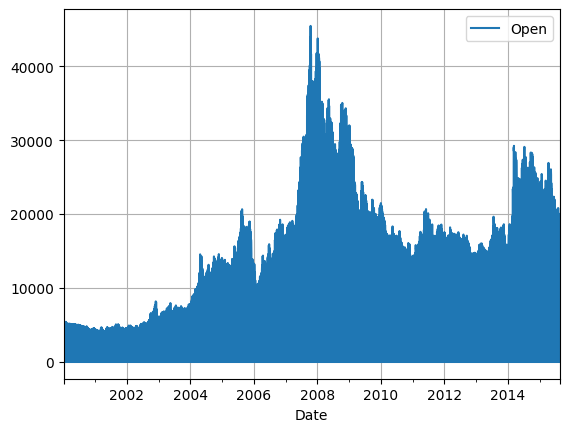

In [15]:
df.plot(grid=True)

In [16]:
train_df = df.loc[:'01-01-2014']
test_df = df.loc['01-02-2014':]

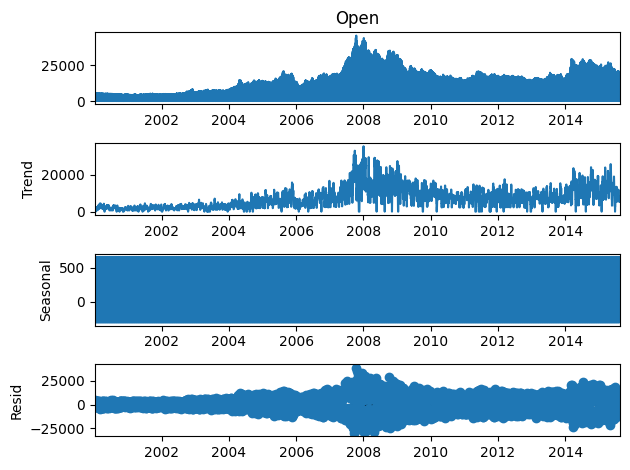

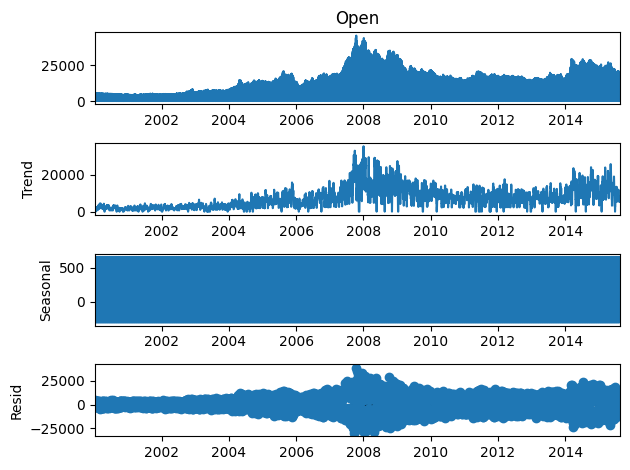

In [17]:
decompose_add = seasonal_decompose(df['Open'])
decompose_add.plot()

In [18]:
def adf_test(timeseries):
    print('Hasil Dickey-Fuller')
    print('------------------------------------------')
    adftest = adfuller(timeseries)
    adf_output = pd.Series(adftest[0:4], index = ['Test Statistic','P-Value','Lags Used','Number Of Observation Used'])
    for key, Value in adftest[4].items() :
        adf_output['Cricitcal Value (%s)' %key] =  Value
        print (adf_output)       
adf_test(df.values)
         

Hasil Dickey-Fuller
------------------------------------------
Test Statistic                  -4.477277
P-Value                          0.000216
Lags Used                       33.000000
Number Of Observation Used    5674.000000
Cricitcal Value (1%)            -3.431503
dtype: float64
Test Statistic                  -4.477277
P-Value                          0.000216
Lags Used                       33.000000
Number Of Observation Used    5674.000000
Cricitcal Value (1%)            -3.431503
Cricitcal Value (5%)            -2.862050
dtype: float64
Test Statistic                  -4.477277
P-Value                          0.000216
Lags Used                       33.000000
Number Of Observation Used    5674.000000
Cricitcal Value (1%)            -3.431503
Cricitcal Value (5%)            -2.862050
Cricitcal Value (10%)           -2.567041
dtype: float64


In [19]:
diff_df = df.diff()
diff_df.head()

,Open
Date,
2000-01-04,NaN
2000-01-05,5369.58
2000-01-06,-170.00
2000-01-07,-5199.83
2000-01-08,0.02


In [20]:
diff_df.dropna(inplace=True)

<Axes: xlabel='Date'>

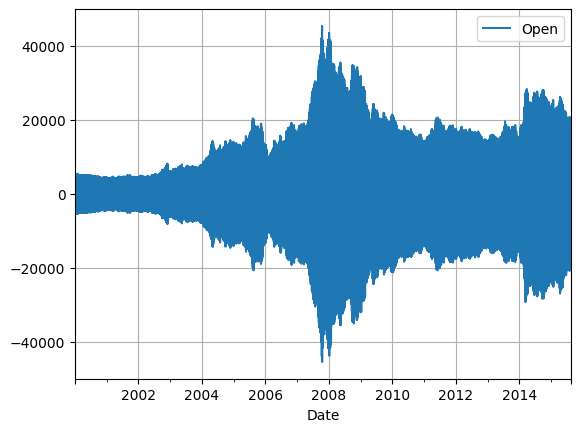

In [21]:
diff_df.plot(grid=True)

In [22]:
adf_test(diff_df)

Hasil Dickey-Fuller
------------------------------------------
Test Statistic                 -24.090784
P-Value                          0.000000
Lags Used                       33.000000
Number Of Observation Used    5673.000000
Cricitcal Value (1%)            -3.431503
dtype: float64
Test Statistic                 -24.090784
P-Value                          0.000000
Lags Used                       33.000000
Number Of Observation Used    5673.000000
Cricitcal Value (1%)            -3.431503
Cricitcal Value (5%)            -2.862050
dtype: float64
Test Statistic                 -24.090784
P-Value                          0.000000
Lags Used                       33.000000
Number Of Observation Used    5673.000000
Cricitcal Value (1%)            -3.431503
Cricitcal Value (5%)            -2.862050
Cricitcal Value (10%)           -2.567041
dtype: float64


c:\Users\hp5cd\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


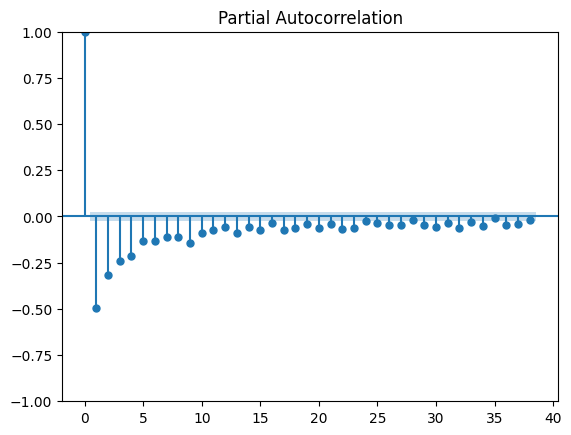

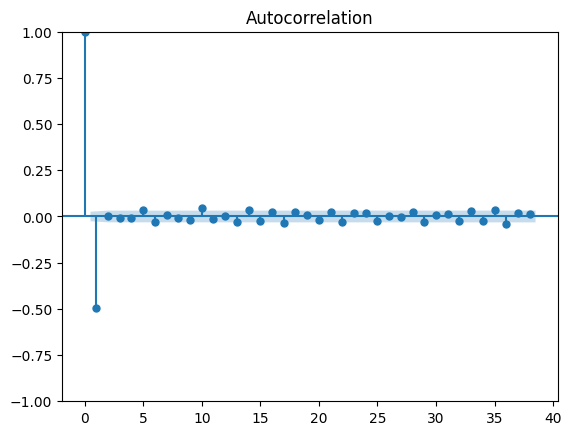

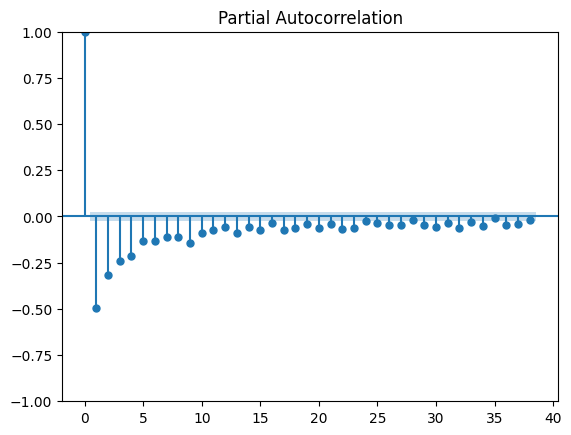

In [23]:
plot_acf(diff_df)
plot_pacf(diff_df)

# single exponensial smoothiing


In [24]:
single_exp = SimpleExpSmoothing(train_df).fit()
single_exp_train_pred = single_exp.fittedvalues
single_exp_test_pred = single_exp.forecast(596)

c:\Users\hp5cd\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<Axes: xlabel='Date'>

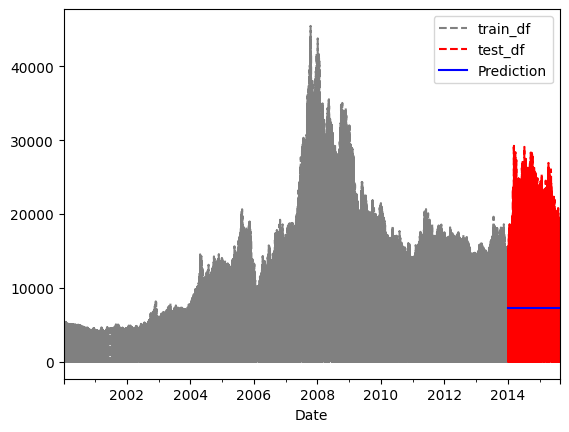

In [25]:
train_df['Open'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['Open'].plot(style='--', color='r', legend=True, label='test_df')
single_exp_test_pred.plot(color='b', legend=True, label='Prediction')

In [26]:
print('Train_RMSE :',mean_squared_error(train_df, single_exp_train_pred)**0.5)
print('Train_RMSE :',mean_squared_error(test_df, single_exp_test_pred)**0.5)
print('Train MAPE :', mean_absolute_percentage_error(train_df, single_exp_train_pred))
print('Test MAPE:', mean_absolute_percentage_error(test_df, single_exp_test_pred))


Train_RMSE : 8628.854248665757
Train_RMSE : 12654.427879889245
Train MAPE : 239.6949256062995
Test MAPE: 159.74630032311282


# double exponensial smothing 

In [27]:
double_exp = ExponentialSmoothing(train_df, trend=None, initialization_method='legacy-heuristic', seasonal='add', seasonal_periods=5, damped_trend=False).fit()
double_exp_train_pred = double_exp.fittedvalues
double_exp_test_pred = double_exp.forecast(596)

c:\Users\hp5cd\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<Axes: xlabel='Date'>

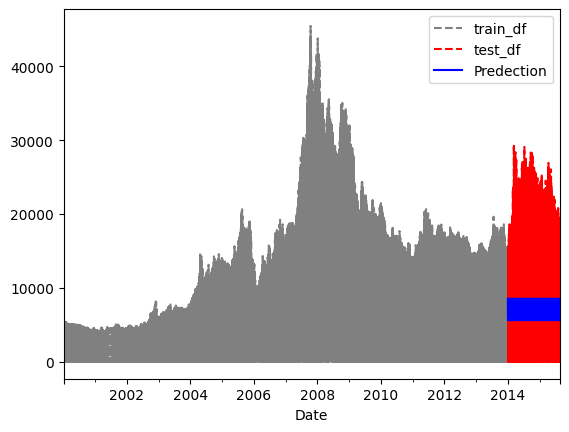

In [28]:
train_df['Open'].plot(style="--", color='gray', legend=True, label='train_df')
test_df['Open'].plot(style='--', color='red', legend=True, label='test_df')
double_exp_test_pred.plot(color='blue', legend=True, label='Predection')

In [29]:
print('Train_RMSE :',mean_squared_error(train_df, double_exp_train_pred)**0.5)
print('Train_RMSE :',mean_squared_error(test_df, double_exp_test_pred)**0.5)
print('Train MAPE :', mean_absolute_percentage_error(train_df, double_exp_train_pred))
print('Test MAPE:', mean_absolute_percentage_error(test_df, double_exp_test_pred))


Train_RMSE : 8672.66299343691
Train_RMSE : 12745.326900216454
Train MAPE : 242.8633906423164
Test MAPE: 160.40315130873577


# arima

In [33]:
ar = ARIMA(train_df, order=(4,1,4)).fit()
ar_train_pred = ar.fittedvalues
ar_test_pred = ar.forecast(596)

c:\Users\hp5cd\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Date'>

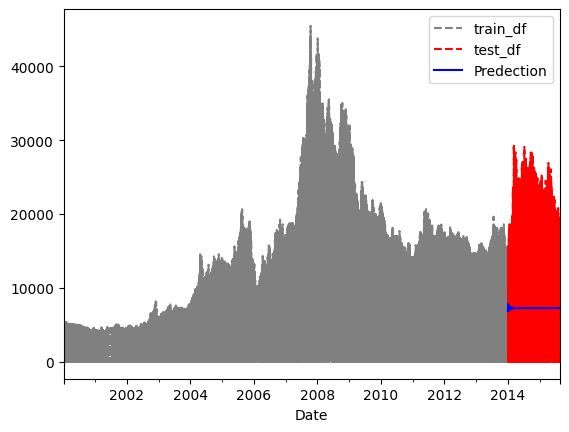

In [34]:
train_df['Open'].plot(style="--", color='gray', legend=True, label='train_df')
test_df['Open'].plot(style='--', color='red', legend=True, label='test_df')
ar_test_pred.plot(color='blue', legend=True, label='Predection')

In [35]:
print('Train_RMSE :',mean_squared_error(train_df, ar_train_pred)**0.5)
print('Train_RMSE :',mean_squared_error(test_df, ar_test_pred)**0.5)
print('Train MAPE :', mean_absolute_percentage_error(train_df, ar_train_pred))
print('Test MAPE:', mean_absolute_percentage_error(test_df, ar_test_pred))


Train_RMSE : 8617.114299486193
Train_RMSE : 12646.667494310852
Train MAPE : 241.54226737247748
Test MAPE: 160.32405991792453


# perbandingan Algoritma

In [36]:
comparision_df = pd.DataFrame(data=[
    ['Single Exp Smoothing',12654.42787, 159.74630],
    ['Double Exp Smoothing',12745.32690, 160.40315],
    ['ARIMA',12646.66749,160.32405]
    ],
    columns=['Model', 'RMSE', 'MAPE'])
comparision_df.set_index('Model', inplace=True)

In [37]:
comparision_df.sort_values(by='RMSE')

,RMSE,MAPE
Model,,
ARIMA,12646.66749,160.32405
Single Exp Smoothing,12654.42787,159.74630
Double Exp Smoothing,12745.32690,160.40315


In [38]:
double_exp = ExponentialSmoothing(df, trend=None, initialization_method='legacy-heuristic', seasonal='add', seasonal_periods=5, damped_trend=False).fit()
double_exp_pred = double_exp.forecast(596)

c:\Users\hp5cd\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

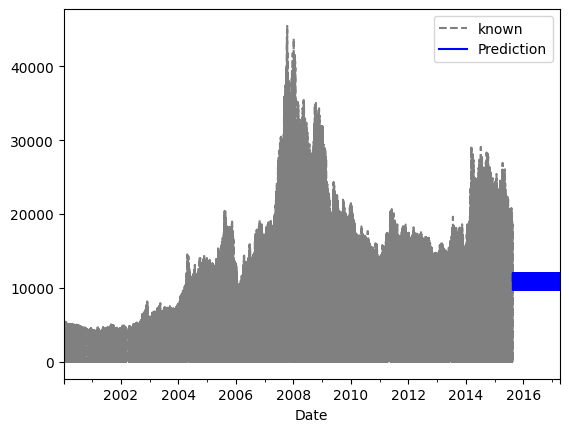

In [39]:
df['Open'].plot(style='--', color='gray', legend=True, label='known')
double_exp_pred.plot(color='b', legend=True, label='Prediction')
plt.show

In [40]:
import pickle

In [41]:
pickle.dump(ar, open('prediksiopen.sav', 'wb'))